# week2 class code

In [59]:
import cv2
import sys
import os
import matplotlib.pyplot as plt
def trans2show(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img=cv2.imread("tangsan.jpg")
dog=cv2.imread("dog.png")
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

dog_gray = cv2.cvtColor(dog,cv2.COLOR_RGB2GRAY)



In [40]:
print(dog.shape)

(852, 590, 3)


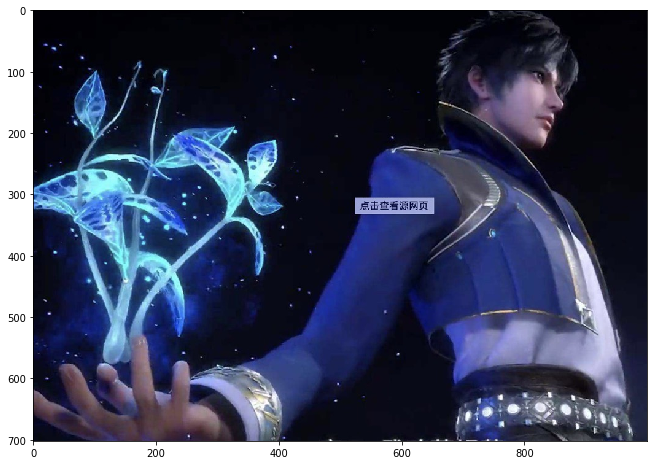

In [54]:
plt.figure(figsize=(11,11))
plt.imshow(trans2show(img))
plt.show()

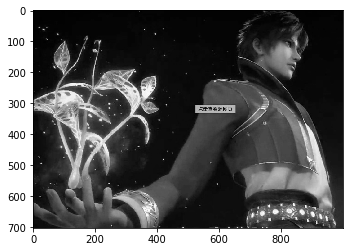

In [55]:
plt.imshow(gray,cmap='gray')
plt.show()

## 灰度变换

### 反色变换

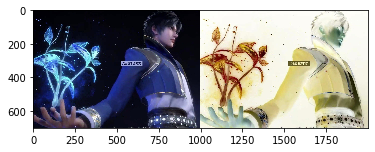

In [10]:
#反色变换
reverse_c=img.copy()
rows=img.shape[0]
cols=img.shape[1]
deeps=img.shape[2]
for i in range(rows):
    for j in range(cols):
        for d in range(deeps):
            reverse_c[i][j][d]=255-reverse_c[i][j][d]

cv2.imwrite("tangsan_img_reverse.jpg",cv2.hconcat([img,reverse_c]))
plt.imshow(trans2show(cv2.hconcat([img,reverse_c])))
plt.show()

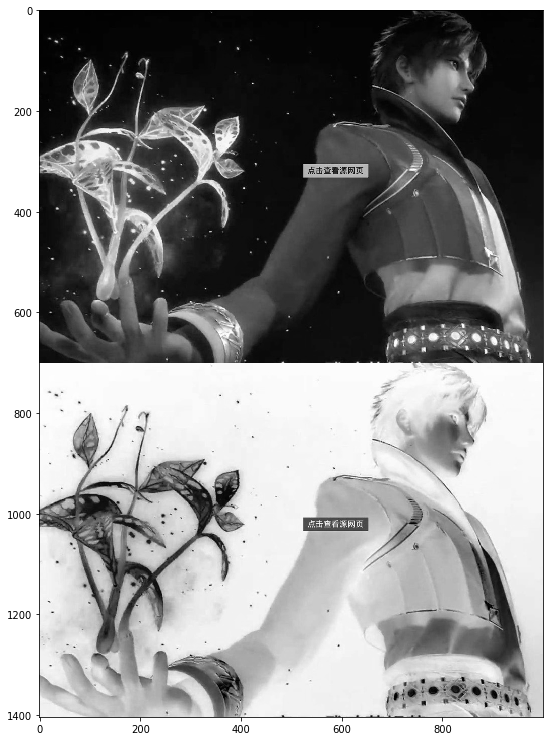

In [58]:
#反色变换
reverse_c=gray.copy()
rows=gray.shape[0]
cols=gray.shape[1]
for i in range(rows):
    for j in range(cols):
            reverse_c[i][j]=255-reverse_c[i][j]

cv2.imwrite("tangsan_img_reverse.jpg",cv2.hconcat([gray,reverse_c]))
plt.figure(figsize=(13,13))
plt.imshow(trans2show(cv2.vconcat([gray,reverse_c])))
plt.show()

### gamma变换，伽马变换

In [51]:
#伽马变换

#img = cv2.cvtColor(img,cv2.COLOR_RGB2BRG)
gamma_c=dog.copy()
rows=dog.shape[0]
cols=dog.shape[1]
deeps=dog.shape[2]
for i in range(rows):
    for j in range(cols):
        for d in range(deeps):
            gamma_c[i][j][d]=3*pow(gamma_c[i][j][d],0.9)

cv2.imwrite("tangsan_img_gamma_c.jpg",cv2.hconcat([dog,gamma_c]))
os.system("open tangsan_img_gamma_c.jpg")

32512

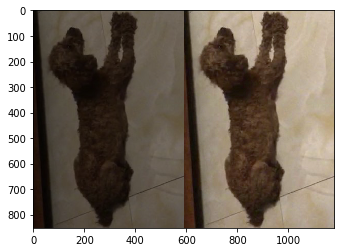

In [52]:
plt.imshow(trans2show(cv2.hconcat([dog,gamma_c])))
plt.show()

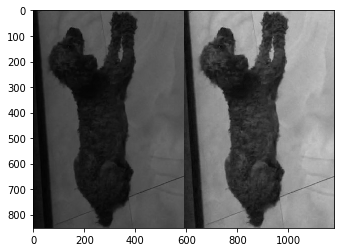

In [63]:
#伽马变换

#img = cv2.cvtColor(img,cv2.COLOR_RGB2BRG)
gamma_c=dog_gray.copy()
rows=dog_gray.shape[0]
cols=dog_gray.shape[1]
for i in range(rows):
    for j in range(cols):
            gamma_c[i][j]=3*pow(gamma_c[i][j],0.9)

cv2.imwrite("tangsan_img_gamma_c.jpg",cv2.hconcat([dog_gray,gamma_c]))
os.system("open tangsan_img_gamma_c.jpg")
plt.imshow(trans2show(cv2.hconcat([dog_gray,gamma_c])))
plt.show()

## 直方图与直方图均衡化【面试常考】

### 不同图片的直方图

In [65]:
# 直方图
import numpy as np
hist = np.zeros(256)
rows = img.shape[0]
cols = img.shape[1]
for i in range(rows):
    for j in range(cols):
         tmp = gray[i][j]
         hist[tmp]=hist[tmp]+1

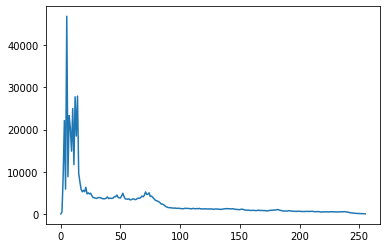

In [66]:
import matplotlib.pyplot as plt
#print(hist)
#plt.show(hist)
plt.plot(hist)
plt.show()

In [67]:
# 直方图
import numpy as np
hist = np.zeros(256)
#import pdb
#pdb.set_traoce()
img = cv2.imread("hist.png")
rows = img.shape[0]
cols = img.shape[1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
for i in range(rows):
    for j in range(cols):
         tmp = gray[i][j]
         hist[tmp]=hist[tmp]+1

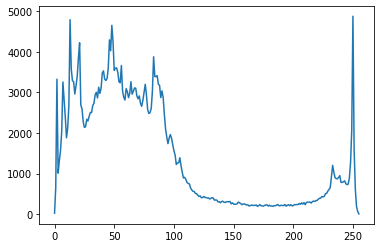

In [16]:
import matplotlib.pyplot as plt
#print(hist)
#plt.show(hist)
plt.plot(hist)
plt.show()

### 直方图均衡化

In [17]:
trans = hist/(rows*cols)*255
for i in range(1,len(trans)):
    trans[i]=trans[i-1]+trans[i]

In [18]:
print(int(trans[0]))
print(trans.shape)

0
(256,)


In [19]:
gray_h = gray.copy()
for i in range(rows):
    for j in range(cols):
        gray_h[i][j] = int(trans[gray[i][j]])

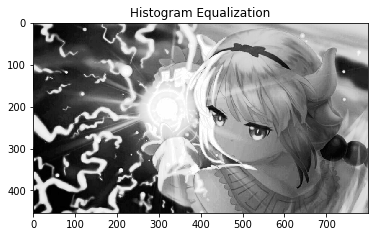

In [21]:
plt.imshow(gray_h,cmap='gray')
plt.title("Histogram Equalization")
plt.show()

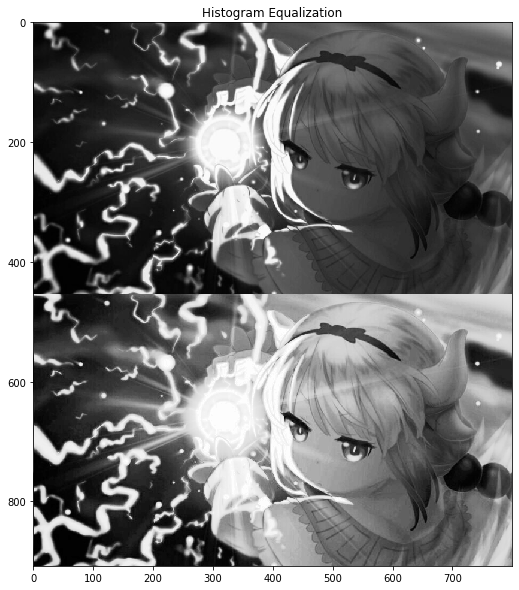

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.vconcat([gray,gray_h]),cmap='gray')
plt.title("scr and Histogram Equalization")
plt.show()

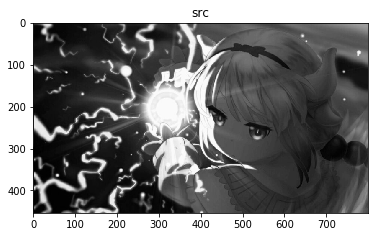

In [22]:
plt.imshow(gray,cmap='gray')
plt.title("src")
plt.show()

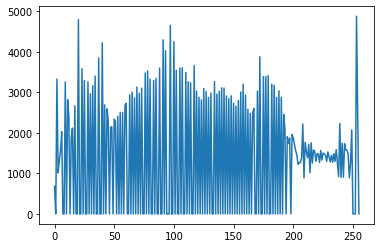

In [23]:
hist_h=np.zeros(256)
for i in range(rows):
    for j in range(cols):
         tmp = gray_h[i][j]
         hist_h[tmp]=hist_h[tmp]+1
plt.plot(hist_h)
plt.show()